In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sympy import *

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 14

In [2]:
dir = os.path.join('..', 'data')
file_ingred = 'hald_ingredients.csv'
file_heat = 'hald_heat.csv'

In [3]:
# load data
A = np.loadtxt(os.path.join(dir, file_ingred), delimiter=',', dtype='float32')
b = np.loadtxt(os.path.join(dir, file_heat), delimiter=',', dtype='float32')
Matrix(A)

Matrix([
[ 7.0, 26.0,  6.0, 60.0],
[ 1.0, 29.0, 15.0, 52.0],
[11.0, 56.0,  8.0, 20.0],
[11.0, 31.0,  8.0, 47.0],
[ 7.0, 52.0,  6.0, 33.0],
[11.0, 55.0,  9.0, 22.0],
[ 3.0, 71.0, 17.0,  6.0],
[ 1.0, 31.0, 22.0, 44.0],
[ 2.0, 54.0, 18.0, 22.0],
[21.0, 47.0,  4.0, 26.0],
[ 1.0, 40.0, 23.0, 34.0],
[11.0, 66.0,  9.0, 12.0],
[10.0, 68.0,  8.0, 12.0]])

In [4]:
# SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)
print(U.shape, S.shape, VT.shape)
S = np.diag(S)
x_tilde = VT.T @ np.linalg.inv(S) @ U.T @ b
print('x', x_tilde.shape)

(13, 4) (4,) (4, 4)
x (4,)


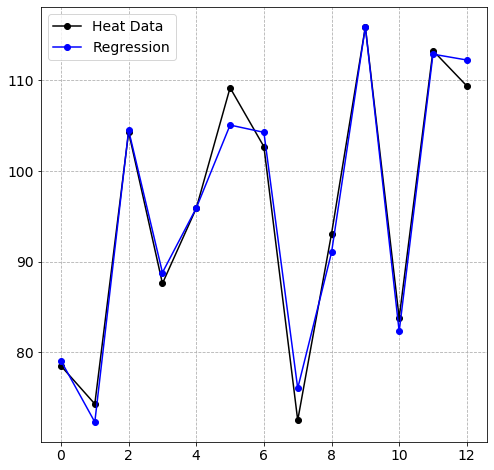

In [5]:
plt.figure()
plt.plot(b, '-o', c='k', linewidth=1.5, markersize=6, label='Heat Data')  # True labels
plt.plot(A@x_tilde, '-o', c='b', linewidth=1.5, markersize=6, label='Regression')
plt.grid(linestyle='--')
plt.legend()
plt.show()